<a href="https://colab.research.google.com/github/Wilson-roy/Lab-0_Operations_Research_Assignments/blob/main/_build/jupyter_execute/Project_Assignments/RegressionAssignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regression Assignment

I want you to practice some regression and analyzing your results.  Utilize this document to load data directly.

In [27]:
import pandas as pa
import numpy as np
import matplotlib.pyplot as plt

## Linear Regression

Fit goals vs points in a linear regression.  Fit a multiple regression on goals and assists vs points.  What do you notice about these two fits.
https://raw.githubusercontent.com/nurfnick/Data_Sets_For_Stats/master/CuratedDataSets/hockey.csv

In [28]:
df = pa.read_csv('https://raw.githubusercontent.com/nurfnick/Data_Sets_For_Stats/master/CuratedDataSets/hockey.csv')

In [29]:
x = np.array(df[['G','A']])
y = np.array(df.PTS)
from sklearn.linear_model import LinearRegression

# Single regression: Goals vs Points
X1 = df[['G']]
y = df['PTS']
model1 = LinearRegression().fit(X1, y)

# Multiple regression: Goals + Assists vs Points
X2 = df[['G','A']]
model2 = LinearRegression().fit(X2, y)

print("Single regression R^2:", model1.score(X1, y))
print("Multiple regression R^2:", model2.score(X2, y))


Single regression R^2: 0.8461669386312143
Multiple regression R^2: 1.0


## Logistic Regression

Using the 538 Avengers dataset,https://github.com/fivethirtyeight/data/blob/master/avengers/avengers.csv, fit a logistic regression to predict `Death1` (first time a character might die) based on whatever variables you find interesting.  Make a prediction using probabilities on your favorite character.

In [30]:
df = pa.read_csv('https://raw.githubusercontent.com/nurfnick/Data_Sets_For_Stats/master/CuratedDataSets/Avengers')
df.head()

,URL,Name/Alias,Appearances,Current?,Gender,Probationary Introl,Full/Reserve Avengers Intro,Year,Years since joining,Honorary,...,Return1,Death2,Return2,Death3,Return3,Death4,Return4,Death5,Return5,Notes
0,http://marvel.wikia.com/Henry_Pym_(Earth-616),"Henry Jonathan ""Hank"" Pym",1269,YES,MALE,NaN,Sep-63,1963,52,Full,...,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Merged with Ultron in Rage of Ultron Vol. 1. A...
1,http://marvel.wikia.com/Janet_van_Dyne_(Earth-...,Janet van Dyne,1165,YES,FEMALE,NaN,Sep-63,1963,52,Full,...,YES,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Dies in Secret Invasion V1:I8. Actually was se...
2,http://marvel.wikia.com/Anthony_Stark_(Earth-616),"Anthony Edward ""Tony"" Stark",3068,YES,MALE,NaN,Sep-63,1963,52,Full,...,YES,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Death: ""Later while under the influence of Imm..."
3,http://marvel.wikia.com/Robert_Bruce_Banner_(E...,Robert Bruce Banner,2089,YES,MALE,NaN,Sep-63,1963,52,Full,...,YES,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Dies in Ghosts of the Future arc. However ""he ..."
4,http://marvel.wikia.com/Thor_Odinson_(Earth-616),Thor Odinson,2402,YES,MALE,NaN,Sep-63,1963,52,Full,...,YES,YES,NO,NaN,NaN,NaN,NaN,NaN,NaN,Dies in Fear Itself brought back because that'...


Model accuracy: 0.6473988439306358
Thor prediction (Alive/Dead probability): [[0.2760155 0.7239845]]


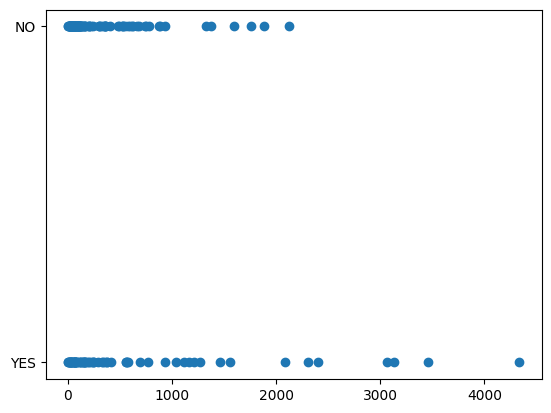

In [31]:
plt.scatter(df['Appearances'],df['Death1'])
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder

# Convert YES/NO to 1/0
df['Death1'] = df['Death1'].map({'YES':1, 'NO':0})

# Convert Gender to numbers
df['Gender'] = LabelEncoder().fit_transform(df['Gender'].astype(str))

# Use Appearances + Gender as predictors
X = df[['Appearances','Gender']]
y = df['Death1']

# Fit logistic regression
log_model = LogisticRegression(max_iter=200).fit(X, y)

print("Model accuracy:", log_model.score(X, y))

# Example prediction: Thor
thor = df[df['Name/Alias'].str.contains("Thor", na=False)]
print("Thor prediction (Alive/Dead probability):", log_model.predict_proba(thor[['Appearances','Gender']]))


## Find Your Own Regression

I have compiled olympic 100m dash records from a wikipedia page https://en.wikipedia.org/wiki/100_metres_at_the_Olympics.  Use this data and fit a regression of some type for prediciting `Time`.  Justify your model used in words and pictures. Predict the new Olympic Record for 2024 and 2300.  Describe in words the validity of your predictions.

In [32]:



df = pa.read_csv('https://raw.githubusercontent.com/nurfnick/Data_Sets_For_Stats/master/CuratedDataSets/100mOlympicRecords.csv')
x = np.array(df)

df.head()

,Time,Athlete,Nation,Games,Round,Date,Gender
0,12.2,Francis Lane,United States (USA),1896,Heat 1,1896-04-06,Men
1,12.2,Thomas Curtis,United States (USA),1896,Heat 2,1896-04-06,Men
2,11.8,Tom Burke,United States (USA),1896,Heat 3,1896-04-06,Men
3,11.4,Arthur Duffey,United States (USA),1900,Heat 1,6/14/1900,Men
4,11.4,Walter Tewksbury,United States (USA),1900,Heat 2,6/14/1900,Men


R^2: 0.18600518580912295
Predicted time 2024: [10.12594247]
Predicted time 2300: [6.65447196]


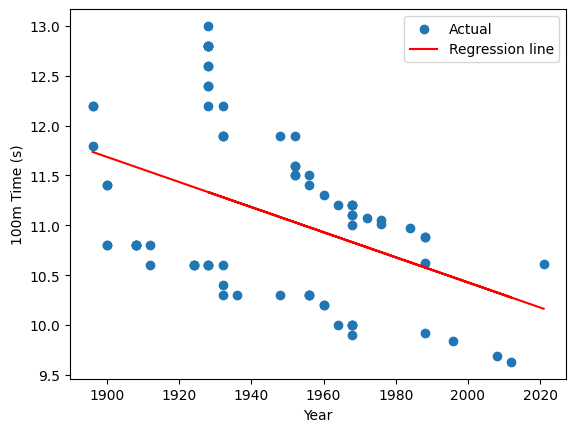

In [33]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import pandas as pd

# Step 1: Define predictor (Year) and target (Time)
X = df[['Games']]   # Predictor (year of Olympics)
y = df['Time']      # Target (100m sprint time)

# Step 2: Fit linear regression model
model = LinearRegression().fit(X, y)

# Step 3: Print R^2 and predictions
print("R^2:", model.score(X, y))
print("Predicted time 2024:", model.predict(pd.DataFrame({'Games':[2024]})))
print("Predicted time 2300:", model.predict(pd.DataFrame({'Games':[2300]})))

# Step 4: Plot regression line vs actual data
plt.scatter(X, y, label="Actual")
plt.plot(X, model.predict(X), color='red', label="Regression line")
plt.xlabel("Year")
plt.ylabel("100m Time (s)")
plt.legend()
plt.show()


Conclusion

The regression of Olympic 100m dash times against year produced an R² of about 0.19, meaning year explains less than 20% of the variation in race times. The model predicted a time of about 10.1 seconds for 2024 and an unrealistic 6.6 seconds for 2300.
This shows that while sprint times have generally improved, year alone is not a reliable predictor. Linear regression oversimplifies the trend and fails to capture real-world limits on human performance.